In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_samples,silhouette_score 
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

data=pd.read_excel(r'C:\Users\hxy\Desktop\招聘\运营\2.封硕\5.渠道客户分层\customer.xlsx',sheet_name='Sheet0')
data.head()

,userid,vip,enddate,active_1month,active_3month,active_6month,amount_1month,amount_3month,amount_6month,consumes3month_effects,consumes6month_effects,consumes3month_resources,consumes6month_resources,agent_org_name,city,last_login,infoids,resumes
0,73154825609512,1,2022-08-23 23:59:59.0,32,85,133,0.00,493.03,1083.55,0,0,101,220,湖南创未来信息（招聘，常德）,常德,20211221,335,18
1,83510339559970,1,2022-10-30 23:59:59.0,34,34,34,136.70,136.70,136.70,4,4,23,23,滨州网森信息（滨州，招聘）,滨州,20211229,100,39
2,71966237544219,1,2022-03-21 23:59:59.0,31,59,148,138.93,551.40,1110.11,11,24,56,56,山东鲁中信息技术（招聘，临沂）,临沂,20211216,1544,107
3,82514777183543,1,2022-09-15 23:59:59.0,35,72,72,212.55,258.24,258.24,12,12,0,0,安徽泓铭顶尖（招聘，宣城）,宣城,20211228,573,95
4,71702229243924,1,2022-07-07 23:59:59.0,28,62,78,125.27,283.93,1074.06,67,124,327,555,焦作市华发电子（招聘，焦作）,焦作,20211230,656,52


In [ ]:
归一化/标准化

优点
提升模型的收敛速度
提升模型的精度
深度学习中数据归一化可以防止模型梯度爆炸

使用场景
如果对输出结果范围有要求，用归一化
如果数据较为稳定，不存在极端的最大最小值，用归一化
如果数据存在异常值和较多噪音，用标准化，可以间接通过中心化避免异常值和极端值的影响


In [3]:
#min-max标准化  标准化不改变数据分布（数据几何距离不变）

a_1m = np.array(data['active_1month'])
data1 = (a_1m - min(a_1m)) / (max(a_1m) - min(a_1m))
data1


array([0.53333333, 0.56666667, 0.51666667, ..., 0.21666667, 0.98333333,
       0.25      ])

In [4]:
#Z-score 标准化

data2 = (a_1m - a_1m.mean()) / a_1m.std()
data2

array([ 0.07775853,  0.16886074,  0.03220743, ..., -0.78771243,
        1.30763831, -0.69661022])

In [5]:
#归一化   改变数据分布使各个特征维度对目标函数的影响权重是一致的

data3 = (a_1m - a_1m.mean()) / max(a_1m)
data3

array([ 0.02845102,  0.06178436,  0.01178436, ..., -0.28821564,
        0.47845102, -0.25488231])

In [3]:
# https://blog.csdn.net/ch206265/article/details/106460027/
data_city = data.loc[data['city']=="唐山"]
data_city

,userid,vip,enddate,active_1month,active_3month,active_6month,amount_1month,amount_3month,amount_6month,consumes3month_effects,consumes6month_effects,consumes3month_resources,consumes6month_resources,agent_org_name,city,last_login,infoids,resumes
79,51786975018775,1,2022-02-26 23:59:59.0,51,99,171,5.05,5.05,88.63,2,6,0,1,唐山市润持佳通信息科技有限公司,唐山,20211230,2169,455
485,41826386,1,2022-03-02 23:59:59.0,2,36,101,0.00,505.44,1308.00,0,2,33,85,唐山市润持佳通信息科技有限公司,唐山,20211218,150,28
764,51347060157205,1,2022-11-05 23:59:59.0,42,102,189,1.64,2996.64,3117.99,1,4,494,1385,唐山市润持佳通信息科技有限公司,唐山,20211228,2737,1027
772,80680582392875,1,2022-06-27 23:59:59.0,60,120,184,524.08,968.00,1166.48,1,1,412,441,唐山市润持佳通信息科技有限公司,唐山,20211230,2390,111
994,79422012947234,1,2022-04-29 23:59:59.0,60,114,206,51.00,51.00,1382.00,0,0,29,177,唐山市润持佳通信息科技有限公司,唐山,20211230,1817,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205125,59387240765710,1,2022-05-06 23:59:59.0,58,106,188,76.45,139.85,2104.52,6,98,48,57,唐山市润持佳通信息科技有限公司,唐山,20211230,1276,132
205399,81426714608159,1,2022-08-30 23:59:59.0,0,0,2,0.00,0.00,4.50,1,2,0,0,唐山市润持佳通信息科技有限公司,唐山,20210831,2,0
205471,15036372029959,1,2022-09-27 23:59:59.0,48,81,81,530.93,1112.62,1112.62,87,87,0,0,唐山市润持佳通信息科技有限公司,唐山,20211230,154,59
205697,72027775558673,1,2022-05-30 23:59:59.0,59,117,206,946.96,1795.96,1824.41,1,3,372,890,唐山市润持佳通信息科技有限公司,唐山,20211230,3707,472


In [4]:
#使用iloc方法，iloc[row行，column列]，取一整列的意思就是使列一样，把这一列里的每一行都取出来。
data_city.iloc[:,0:]  

,userid,vip,enddate,active_1month,active_3month,active_6month,amount_1month,amount_3month,amount_6month,consumes3month_effects,consumes6month_effects,consumes3month_resources,consumes6month_resources,agent_org_name,city,last_login,infoids,resumes
79,51786975018775,1,2022-02-26 23:59:59.0,51,99,171,5.05,5.05,88.63,2,6,0,1,唐山市润持佳通信息科技有限公司,唐山,20211230,2169,455
485,41826386,1,2022-03-02 23:59:59.0,2,36,101,0.00,505.44,1308.00,0,2,33,85,唐山市润持佳通信息科技有限公司,唐山,20211218,150,28
764,51347060157205,1,2022-11-05 23:59:59.0,42,102,189,1.64,2996.64,3117.99,1,4,494,1385,唐山市润持佳通信息科技有限公司,唐山,20211228,2737,1027
772,80680582392875,1,2022-06-27 23:59:59.0,60,120,184,524.08,968.00,1166.48,1,1,412,441,唐山市润持佳通信息科技有限公司,唐山,20211230,2390,111
994,79422012947234,1,2022-04-29 23:59:59.0,60,114,206,51.00,51.00,1382.00,0,0,29,177,唐山市润持佳通信息科技有限公司,唐山,20211230,1817,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205125,59387240765710,1,2022-05-06 23:59:59.0,58,106,188,76.45,139.85,2104.52,6,98,48,57,唐山市润持佳通信息科技有限公司,唐山,20211230,1276,132
205399,81426714608159,1,2022-08-30 23:59:59.0,0,0,2,0.00,0.00,4.50,1,2,0,0,唐山市润持佳通信息科技有限公司,唐山,20210831,2,0
205471,15036372029959,1,2022-09-27 23:59:59.0,48,81,81,530.93,1112.62,1112.62,87,87,0,0,唐山市润持佳通信息科技有限公司,唐山,20211230,154,59
205697,72027775558673,1,2022-05-30 23:59:59.0,59,117,206,946.96,1795.96,1824.41,1,3,372,890,唐山市润持佳通信息科技有限公司,唐山,20211230,3707,472


In [5]:
from sklearn.cluster import KMeans
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

In [6]:
x = data_city[['active_1month','active_3month','active_6month','amount_1month','amount_3month','amount_6month','consumes3month_effects','consumes6month_effects','consumes3month_resources','consumes3month_resources']]
x
# x1 = np.arange(len(x))
# x1

,active_1month,active_3month,active_6month,amount_1month,amount_3month,amount_6month,consumes3month_effects,consumes6month_effects,consumes3month_resources,consumes3month_resources
79,51,99,171,5.05,5.05,88.63,2,6,0,0
485,2,36,101,0.00,505.44,1308.00,0,2,33,33
764,42,102,189,1.64,2996.64,3117.99,1,4,494,494
772,60,120,184,524.08,968.00,1166.48,1,1,412,412
994,60,114,206,51.00,51.00,1382.00,0,0,29,29
...,...,...,...,...,...,...,...,...,...,...
205125,58,106,188,76.45,139.85,2104.52,6,98,48,48
205399,0,0,2,0.00,0.00,4.50,1,2,0,0
205471,48,81,81,530.93,1112.62,1112.62,87,87,0,0
205697,59,117,206,946.96,1795.96,1824.41,1,3,372,372


In [7]:
data1 = (x - x.min()) / (x.max() - x.min())  #min-max标准化
data2 = (x - x.mean())/x.std() #z-score标准化
data1
data2

,active_1month,active_3month,active_6month,amount_1month,amount_3month,amount_6month,consumes3month_effects,consumes6month_effects,consumes3month_resources,consumes3month_resources
79,0.848190,0.986399,1.075608,-0.411176,-0.455859,-0.501994,-0.360506,-0.344406,-0.503744,-0.503744
485,-1.369630,-0.641540,-0.034147,-0.415858,-0.198248,-0.081594,-0.396068,-0.392571,-0.369312,-0.369312
764,0.440835,1.063920,1.360974,-0.414337,1.084274,0.542432,-0.378287,-0.368488,1.508669,1.508669
772,1.255545,1.529045,1.281705,0.069992,0.039888,-0.130386,-0.378287,-0.404613,1.174625,1.174625
994,1.255545,1.374003,1.630485,-0.368578,-0.432203,-0.056082,-0.396068,-0.416654,-0.385607,-0.385607
...,...,...,...,...,...,...,...,...,...,...
205125,1.165021,1.167281,1.345120,-0.344985,-0.386461,0.193020,-0.289382,0.763409,-0.308206,-0.308206
205399,-1.460154,-1.571790,-1.603658,-0.415858,-0.458459,-0.530999,-0.378287,-0.392571,-0.503744,-0.503744
205471,0.712405,0.521273,-0.351220,0.076342,0.114341,-0.148955,1.150873,0.630953,-0.503744,-0.503744
205697,1.210283,1.451524,1.630485,0.462024,0.466139,0.096447,-0.378287,-0.380530,1.011676,1.011676


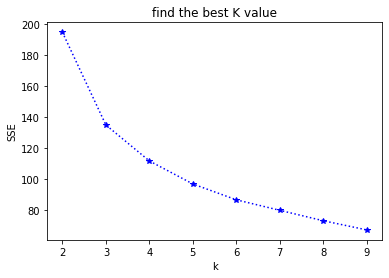

In [8]:
#min-max 肘部法
num = range(2,10)#分别模拟k为2~9的情况，1类没有意义
sse_result=[]#用于存放每种k聚类后的SSE
for k in num:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data1)
    sse_result.append(kmeans.inertia_)#inertia_表示样本到最近的聚类中心的距离总和。
plt.plot(num,sse_result,'b*:')#'b*:'为线的格式设置，b表示蓝色，*为点的标记，:表示线型为点状线条。
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('find the best K value')
plt.show()

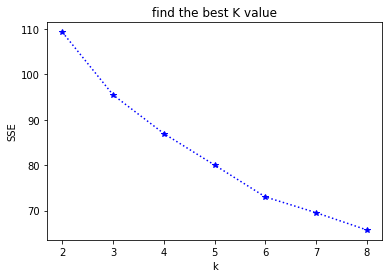

In [9]:
#z-scroe 肘部法

num = range(2,9)#分别模拟k为2~9的情况，1类没有意义；
sse_result=[]#用于存放每种k聚类后的SSE
for k in num:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data2)
    sse_result.append(np.sqrt(kmeans.inertia_))#inertia_表示样本到最近的聚类中心的距离总和。
plt.plot(num,sse_result,'b*:')#'b*:'为线的格式设置，b表示蓝色，*为点的标记，:表示线型为点状线条。
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('find the best K value')
plt.show()

In [80]:
#https://blog.csdn.net/weixin_38753213/article/details/107031845   参考该案例

In [27]:
# 通过平均轮廓系数检验得到最佳的kmeans聚类模型   
# 轮廓系数通过枚举每个K计算平均轮廓系数得到最佳值。

score_list = list() #用来储存每个k下模型的平均轮廓系数
silhouette_ini = -1 # 初始化的平均轮廓系数阈值
for n_clusters in range(2,9):  # 遍历从2到9 有几个限组
    model_kmeans = KMeans(n_clusters=n_clusters,random_state=0) # 建立聚类模型对象
    labels_tmp = model_kmeans.fit_predict(data2) # 训练聚类模型
    silihouette_temp = silhouette_score(data2,labels_tmp,metric='euclidean') # 得到每个K下的平均轮廓系数
    if silihouette_temp > silhouette_ini: # 如果平均轮廓系数更高
        best_k = n_clusters  #  保存k将最好的k存下来
        silhouette_ini = silihouette_temp  # 保存平均轮廓得分
        best_kmeans = model_kmeans  # 保存模型实例对象
        cluster_labels_k = labels_tmp # 保存聚类标签
    score_list.append([n_clusters,silihouette_temp]) # 将每次k及其得分追加到列表

print('{:*^60}'.format('K值对应的轮廓系数:'))
print(np.array(score_list))  # 打印输出所以的k下的详细得分
print('最优的K值是:{0} \n对应的轮廓系数是:{1}'.format(best_k,silhouette_ini))




*************************K值对应的轮廓系数:*************************
[[2.         0.34175765]
 [3.         0.35977147]
 [4.         0.38451308]
 [5.         0.40218565]
 [6.         0.40328981]
 [7.         0.30118406]
 [8.         0.30392905]]
最优的K值是:6 
对应的轮廓系数是:0.4032898135646237


In [64]:
k=6
kmodel = KMeans(n_clusters = k, random_state=123)
kmodel.fit(data2)


KMeans(n_clusters=6, random_state=123)

In [11]:
# 筛选后数据重塑索引
data_city.index = range(len(data_city))

data_city

,userid,vip,enddate,active_1month,active_3month,active_6month,amount_1month,amount_3month,amount_6month,consumes3month_effects,consumes6month_effects,consumes3month_resources,consumes6month_resources,agent_org_name,city,last_login,infoids,resumes
0,51786975018775,1,2022-02-26 23:59:59.0,51,99,171,5.05,5.05,88.63,2,6,0,1,唐山市润持佳通信息科技有限公司,唐山,20211230,2169,455
1,41826386,1,2022-03-02 23:59:59.0,2,36,101,0.00,505.44,1308.00,0,2,33,85,唐山市润持佳通信息科技有限公司,唐山,20211218,150,28
2,51347060157205,1,2022-11-05 23:59:59.0,42,102,189,1.64,2996.64,3117.99,1,4,494,1385,唐山市润持佳通信息科技有限公司,唐山,20211228,2737,1027
3,80680582392875,1,2022-06-27 23:59:59.0,60,120,184,524.08,968.00,1166.48,1,1,412,441,唐山市润持佳通信息科技有限公司,唐山,20211230,2390,111
4,79422012947234,1,2022-04-29 23:59:59.0,60,114,206,51.00,51.00,1382.00,0,0,29,177,唐山市润持佳通信息科技有限公司,唐山,20211230,1817,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,59387240765710,1,2022-05-06 23:59:59.0,58,106,188,76.45,139.85,2104.52,6,98,48,57,唐山市润持佳通信息科技有限公司,唐山,20211230,1276,132
1575,81426714608159,1,2022-08-30 23:59:59.0,0,0,2,0.00,0.00,4.50,1,2,0,0,唐山市润持佳通信息科技有限公司,唐山,20210831,2,0
1576,15036372029959,1,2022-09-27 23:59:59.0,48,81,81,530.93,1112.62,1112.62,87,87,0,0,唐山市润持佳通信息科技有限公司,唐山,20211230,154,59
1577,72027775558673,1,2022-05-30 23:59:59.0,59,117,206,946.96,1795.96,1824.41,1,3,372,890,唐山市润持佳通信息科技有限公司,唐山,20211230,3707,472


In [12]:
# 将原始数据与聚类标签整合

cluster_labels = pd.DataFrame(cluster_labels_k, columns=['clusters']) # 获得训练集下的标签信息
merge_data = pd.concat((data_city,cluster_labels), axis=1) # 将原始处理过的数据跟聚类标签整合
merge_data.head()

,userid,vip,enddate,active_1month,active_3month,active_6month,amount_1month,amount_3month,amount_6month,consumes3month_effects,consumes6month_effects,consumes3month_resources,consumes6month_resources,agent_org_name,city,last_login,infoids,resumes,clusters
0,51786975018775,1,2022-02-26 23:59:59.0,51,99,171,5.05,5.05,88.63,2,6,0,1,唐山市润持佳通信息科技有限公司,唐山,20211230,2169,455,0
1,41826386,1,2022-03-02 23:59:59.0,2,36,101,0.00,505.44,1308.00,0,2,33,85,唐山市润持佳通信息科技有限公司,唐山,20211218,150,28,1
2,51347060157205,1,2022-11-05 23:59:59.0,42,102,189,1.64,2996.64,3117.99,1,4,494,1385,唐山市润持佳通信息科技有限公司,唐山,20211228,2737,1027,0
3,80680582392875,1,2022-06-27 23:59:59.0,60,120,184,524.08,968.00,1166.48,1,1,412,441,唐山市润持佳通信息科技有限公司,唐山,20211230,2390,111,0
4,79422012947234,1,2022-04-29 23:59:59.0,60,114,206,51.00,51.00,1382.00,0,0,29,177,唐山市润持佳通信息科技有限公司,唐山,20211230,1817,4,0


In [13]:
# 每个类别下的样本数量和占比

clustering_count = pd.DataFrame(merge_data['userid'].groupby(merge_data['clusters']).count()).T.rename({'userid':'counts'}) # 计算每个聚类类别的样本量
clustering_ratio = (clustering_count / len(merge_data)).round(2).rename({'counts':'percentage'})  # 计算每个聚类类别的占比
print(clustering_count)
print('#'*30)
print(clustering_ratio)

clusters    0    1  2   3    4  5
counts    694  646  7  61  169  2
##############################
clusters       0     1    2     3     4    5
percentage  0.44  0.41  0.0  0.04  0.11  0.0


In [16]:
# 计算各个聚类类别内部最显著特征值


cluster_features = []  #空量，用于储存最终合并后的所有特征信息
for line in range(best_k):  # 读取每个类索引
    label_data = merge_data[merge_data['clusters']== line] # 获得特定类的数据
    
    part1_data = label_data.iloc[:,1:13]  #获得数值型数据特征
    part1_desc = part1_data.describe().round(3)  # 得到数值型特征的描述性统计
    merge_data1 = part1_desc.iloc[2,:]  #获得数值型特征的均值
    
    part2_data = label_data.iloc[:,14:-1]  #获得数值型数据特征
    part2_desc = part2_data.describe().round(3)  # 得到数值型特征的描述性统计
    merge_data2 = part2_desc.iloc[2,:]  #获得数值型特征的均值
    
    part3_data = label_data.iloc[:,13:14]  #获得字符串型数据特征
    part3_desc = part3_data.describe(include='all')  # 得到字符串型特征的描述性统计
    merge_data3 = part3_desc.iloc[2,:]  #获得字符串型特征的最频繁值
    
    merge_line= pd.concat((merge_data1,merge_data2,merge_data3),axis=0)  #讲数值型和字符串型典型特征沿行合并
    cluster_features.append(merge_line) # 将每个类别下的数据特征追加到列表
    

# 输出完整的类别特征信息
cluster_pd = pd.DataFrame(cluster_features).T
print('{:*^60}'.format('每个类别的主要特征:'))
all_cluster_set= pd.concat((clustering_count,clustering_ratio,cluster_pd),axis=0)
all_cluster_set

*************************每个类别的主要特征:*************************


,0,1,2,3,4,5
counts,694,646,7,61,169,2
percentage,0.44,0.41,0.0,0.04,0.11,0.0
vip,0.0,0.0,0.0,0.0,0.0,0.0
active_1month,11.68,11.837,17.689,21.057,13.443,3.536
active_3month,19.972,18.757,25.87,32.563,23.284,1.414
active_6month,39.951,35.942,65.688,58.639,45.32,59.397
amount_1month,359.691,323.559,4673.37,1514.142,1404.17,3291.115
amount_3month,628.252,445.243,2600.244,1744.737,1735.233,6223.996
amount_6month,1026.709,1046.534,10949.328,2184.48,2630.171,29005.464
consumes3month_effects,16.842,17.085,173.811,26.725,56.941,418.607


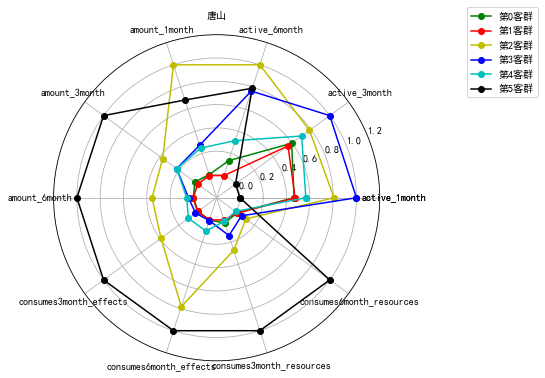

In [61]:
# 输出图形
# 各个类别的数据预处理
# 颜色缩写  k-黑色， g-绿色，w-白色，r-红色，y-黄色，c-藏青，m-紫色，b-蓝色


plt.rcParams['font.sans-serif']=['SimHei']  # 解决绘图中文不显示问题
plt.rcParams['axes.unicode_minus']=False   # 解决绘图中文不显示问题

num_sets = cluster_pd.iloc[1:11,:].T.astype(np.float64) # 获取要展示的数据
num_set_z_score = (num_sets - num_sets.min())/(num_sets.max()-num_sets.min()) # 获得标准化后的数据

#画图
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,polar=True)
labels = np.array(merge_data1.iloc[1:11].index)
cor_list = ['g','r','y','b','c','k']
angles = np.linspace(0,2 * np.pi, len(labels),endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
labels = np.concatenate((labels,[labels[0]]))

# 画雷达图
for i in range(len(num_sets)):  # 循环每个类别
    data_tmp = num_set_z_score.iloc[i,:]   # 获得对应类数据
    data_tmp1 = np.concatenate((data_tmp,[data_tmp[0]]))  # 简历相同首尾字段以便于闭合
    
    ax.plot(angles,data_tmp1,'o-',c=cor_list[i],label = "第%d客群" %(i))  # 画线
    #fill(angles,data_tmp1,alpha=2.5)
    
#设置图像显示格式
ax.set_thetagrids(angles * 180 / np.pi, labels, fontproperties='SimHei') # 设置极坐标轴
ax.set_title(merge_data['city'].loc[1],fontproperties='SimHei') # 设置标题位置
ax.set_rlim(-0.2,1.2) # 设置坐标轴尺度范围
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.1)) # 设置图例位置

TypeError: object of type 'int' has no len()

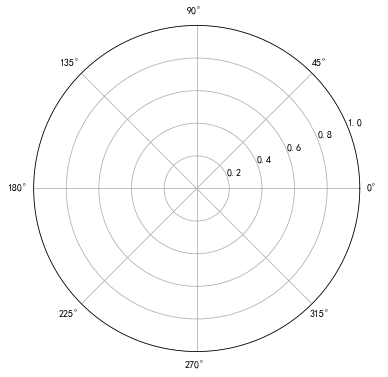

In [62]:
# 输出图形
# 各个类别的数据预处理
# 颜色缩写  k-黑色， g-绿色，w-白色，r-红色，y-黄色，c-藏青，m-紫色，b-蓝色


plt.rcParams['font.sans-serif']=['SimHei']  # 解决绘图中文不显示问题
plt.rcParams['axes.unicode_minus']=False   # 解决绘图中文不显示问题

#num_sets = data2.iloc[1:11,:].T.astype(np.float64) # 获取要展示的数据
#num_set_z_score = (num_sets - num_sets.min())/(num_sets.max()-num_sets.min()) # 获得标准化后的数据

#画图
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,polar=True)
labels = np.array(merge_data.iloc[1:11].index)
cor_list = ['g','r','y','b','c','k']
angles = np.linspace(0,2 * np.pi, len(labels),endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
labels = np.concatenate((labels,[labels[0]]))

# 画雷达图
for i in range(len(n_clusters)):  # 循环每个类别
    data_tmp = merge_data.iloc[i,:]   # 获得对应类数据
    data_tmp1 = np.concatenate((data_tmp,[data_tmp[0]]))  # 简历相同首尾字段以便于闭合
    
    ax.plot(angles,data_tmp1,'o-',c=cor_list[i],label = "第%d客群" %(i))  # 画线
    #fill(angles,data_tmp1,alpha=2.5)
    
#设置图像显示格式
ax.set_thetagrids(angles * 180 / np.pi, labels, fontproperties='SimHei') # 设置极坐标轴
ax.set_title(merge_data['city'].loc[1],fontproperties='SimHei') # 设置标题位置
ax.set_rlim(-0.2,1.2) # 设置坐标轴尺度范围
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.1)) # 设置图例位置

In [63]:
data_tmp

active_1month               0.000000
active_3month               0.000000
active_6month               0.788509
amount_1month               0.682226
amount_3month               1.000000
amount_6month               1.000000
consumes3month_effects      1.000000
consumes6month_effects      1.000000
consumes3month_resources    1.000000
consumes6month_resources    1.000000
Name: 5, dtype: float64